In [1]:
#Load data, filter, make folders
import numpy as np
import plotly.graph_objects as go
import pandas as pd

from main_meg_qc import initial_stuff

In [2]:
duration=1
n_events, df_epochs_mags, df_epochs_grads, epochs_mags, epochs_grads, mags, grads, filtered_d, filtered_d_resamp, raw_cropped, raw=initial_stuff(duration)

Opening raw data file ../data/sub_HT05ND16/210811/mikado-1.fif/...
    Read a total of 8 projection items:
        magn8_iasoff_68deg.fif : PCA-v1 (1 x 306)  idle
        magn8_iasoff_68deg.fif : PCA-v2 (1 x 306)  idle
        magn8_iasoff_68deg.fif : PCA-v3 (1 x 306)  idle
        magn8_iasoff_68deg.fif : PCA-v4 (1 x 306)  idle
        magn8_iasoff_68deg.fif : PCA-v5 (1 x 306)  idle
        magn8_iasoff_68deg.fif : PCA-v6 (1 x 306)  idle
        magn8_iasoff_68deg.fif : PCA-v7 (1 x 306)  idle
        magn8_iasoff_68deg.fif : PCA-v8 (1 x 306)  idle
    Range : 1809000 ... 3375999 =   1809.000 ...  3375.999 secs
Ready.
Opening raw data file /Users/jenya/Local Storage/Job Uni Rieger lab/MEG QC code/Functions/../data/sub_HT05ND16/210811/mikado-2.fif...
    Read a total of 8 projection items:
        magn8_iasoff_68deg.fif : PCA-v1 (1 x 306)  idle
        magn8_iasoff_68deg.fif : PCA-v2 (1 x 306)  idle
        magn8_iasoff_68deg.fif : PCA-v3 (1 x 306)  idle
        magn8_iasoff_68deg.fif :

/Users/jenya/Local Storage/Job Uni Rieger lab/MEG QC code/Functions/data_load_and_folders.py:8: RuntimeWarning: This filename (../data/sub_HT05ND16/210811/mikado-1.fif/) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_file)


    Range : 4943000 ... 5198999 =   4943.000 ...  5198.999 secs
Ready.
['../derivatives', '../derivatives/sub-1', '../derivatives/sub-1/megqc', '../derivatives/sub-1/megqc/csv files', '../derivatives/sub-1/megqc/figures', '../derivatives/sub-1/megqc/reports']
Reading 0 ... 60000  =      0.000 ...    60.000 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 100.00 Hz: -6.02, -6.02 dB

Trigger channel has a non-zero initial value of 18 (consider using initial_event=True to detect this event)
50 events found
Event IDs: [    9    19    21    23    27    31 16393 16403 16405 16411 32749 32750
 32759]


/Users/jenya/Local Storage/Job Uni Rieger lab/MEG QC code/Functions/data_load_and_folders.py:65: RuntimeWarning: Trigger channel contains negative values, using absolute value. If data were acquired on a Neuromag system with STI016 active, consider using uint_cast=True to work around an acquisition bug
  raw_bandpass_resamp.resample(sfreq=h_freq*5)


Trigger channel has a non-zero initial value of 18 (consider using initial_event=True to detect this event)
42 events found
Event IDs: [    9    19    20    21    22    23    27    31 16393 16402 16403 16405
 16411 32741 32749 32750 32759]
Trigger channel has a non-zero initial value of 18 (consider using initial_event=True to detect this event)
5 events found
Event IDs: [ 9 19 20 21]
Not setting metadata
Not setting metadata
5 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 8)
8 projection items activated
Loading data for 5 events and 1201 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
5 matching events found
No baseline correction applied


/Users/jenya/Local Storage/Job Uni Rieger lab/MEG QC code/Functions/data_load_and_folders.py:65: RuntimeWarning: Trigger channel contains negative values, using absolute value. If data were acquired on a Neuromag system with STI016 active, consider using uint_cast=True to work around an acquisition bug
  raw_bandpass_resamp.resample(sfreq=h_freq*5)
/Users/jenya/Local Storage/Job Uni Rieger lab/MEG QC code/Functions/data_load_and_folders.py:80: RuntimeWarning: Trigger channel contains negative values, using absolute value. If data were acquired on a Neuromag system with STI016 active, consider using uint_cast=True to work around an acquisition bug
  events = mne.find_events(data, stim_channel=stim_channel, min_duration=event_dur)


8 projection items activated
Loading data for 5 events and 1201 original time points ...
0 bad epochs dropped


In [3]:
# Separate data for mags and grads in 2 arrays.

selected_mags = [item[1] for item in mags]
selected_grads = [item[1] for item in grads]
data_mags, times = filtered_d_resamp[selected_mags, :]  
data_grads, times = filtered_d_resamp[selected_grads, :]  

Found 2 significant peaks
[ 36 260] [0.36900026 1.76007351]


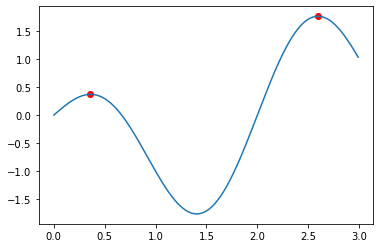

In [4]:
#example from tutorial:

import numpy as np
from mne.preprocessing import peak_finder
t = np.arange(0, 3, 0.01)
x = np.sin(np.pi*t) - np.sin(0.5*np.pi*t)
peak_locs, peak_mags = peak_finder(x) 
print(peak_locs, peak_mags)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(t,x);
plt.scatter(t[peak_locs], peak_mags, color='r');

In [10]:
#find peaks of the first magnetometer channel:
%matplotlib qt 

peak_locs, peak_mags = peak_finder(data_mags[0])
neg_peak_locs, neg_peak_mags = peak_finder(-data_mags[0])

dt=duration/len(data_mags[0])
t=np.arange(0, duration, dt) 
plt.plot(t,data_mags[0]);
plt.scatter(t[peak_locs], peak_mags, color='r');
plt.scatter(t[neg_peak_locs], -neg_peak_mags, color='g');


Found 91 significant peaks
Found 91 significant peaks
